In [2]:
import os
from glob import glob
import xarray as xr

In [2]:
nmolcm2s_to_molm2yr = 1e-9 * 1e4 * 86400. * 365.

archive = '/glade/scratch/mclong/archive'

data_info = dict(
    ctrl=dict(
        casename='g.e22.GOMIPECOIAF_JRA-1p4-2018.TL319_g17.SMYLE.005',
        histpath='/glade/campaign/cesm/development/espwg/SMYLE/initial_conditions/SMYLE-FOSI/ocn/hist',
    ),
)

runs = [
    'g.e22.GOMIPECOIAF_JRA-1p4-2018.TL319_g17.SMYLE.005.PCref2x', 
#    'g.e22.GOMIPECOIAF_JRA-1p4-2018.TL319_g17.SMYLE.005.PCref1.5x',
#    'g.e22.GOMIPECOIAF_JRA-1p4-2018.TL319_g17.SMYLE.005.PCref1.2x',
]
        
        
data_info.update(
    {k.split('.')[-1]: dict(casename=k, histpath=f'{archive}/{k}')
    for k in runs}
)
data_info

{'ctrl': {'casename': 'g.e22.GOMIPECOIAF_JRA-1p4-2018.TL319_g17.SMYLE.005',
  'histpath': '/glade/campaign/cesm/development/espwg/SMYLE/initial_conditions/SMYLE-FOSI/ocn/hist'},
 'PCref2x': {'casename': 'g.e22.GOMIPECOIAF_JRA-1p4-2018.TL319_g17.SMYLE.005.PCref2x',
  'histpath': '/glade/scratch/mclong/archive/g.e22.GOMIPECOIAF_JRA-1p4-2018.TL319_g17.SMYLE.005.PCref2x'}}

In [14]:
dsets = {}
for key, info in data_info.items():
    files = sorted(glob(f"{info['histpath']}/{info['casename']}.pop.h.0356-??.nc"))
    ds = xr.open_mfdataset(files, compat='override', combine='by_coords', coords='minimal')
    
    "mmol/m^3 cm/s"
    with xr.set_options(keep_attrs=True):
        ds['FG_CO2'] = ds.FG_CO2 * nmolcm2s_to_molm2yr
        ds.FG_CO2.attrs['units'] = 'mol m$^{-2}$ yr$^{-1}$'
    
    dsets[key] = ds[['FG_CO2', 'NO3', 'Jint_100m_DIC', 'photoC_TOT_zint_100m'g]].compute()

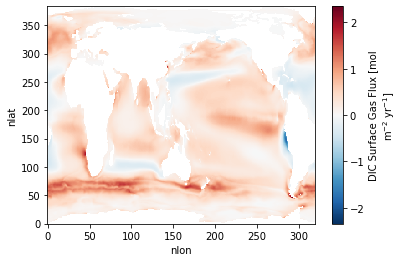

In [12]:
with xr.set_options(keep_attrs=True):
    (dsets['PCref2x'].FG_CO2.mean('time') - dsets['ctrl'].FG_CO2.mean('time')).plot()

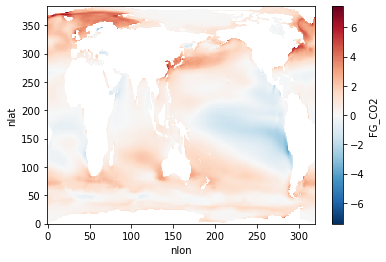

In [13]:
dsets['ctrl'].FG_CO2.mean('time').plot()

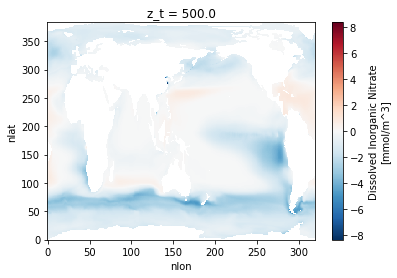

In [16]:
with xr.set_options(keep_attrs=True):
    (dsets['PCref2x'].NO3.isel(z_t=0).mean(['time']) - 
     dsets['ctrl'].NO3.isel(z_t=0).mean(['time'])).plot()